# Laboratory Exercise 3

In [26]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt  # 2D plotting
from bs4 import BeautifulSoup
import requests
import ssl
import difflib as dfl
import re
import statsmodels.formula.api as smf



## Exploratory Data Analysis

In [27]:
#switching data type to integer from string

In [28]:
raw_data = pd.read_excel("shippingdata.xlsx")
raw_data.info

<bound method DataFrame.info of         stops  weight_truck  truck_cube  pieces  pallets  miles_driven  \
0         3.0       45677.0     19286.0  2520.0     28.0         430.0   
1         3.0       46086.0     21250.0  1550.0     35.0         552.0   
2         3.0       46423.0     17671.0  2607.0     20.0         256.0   
3         3.0       46295.0     13969.0  2075.0     20.0         469.0   
4         3.0       43764.0     12713.0  1921.0     19.0         469.0   
...       ...           ...         ...     ...      ...           ...   
130467    3.0       43856.0      8608.0  1756.0     19.0         680.0   
130468    3.0       44110.0     21100.0  1900.0     19.0         680.0   
130469    3.0       46622.0      7942.0  2732.0     19.0         530.0   
130470    3.0       45183.0     16932.0  1796.0     20.0         734.0   
130471    3.0       45489.0     14330.0  1923.0     24.0         595.0   

       estimated_ship_date dispatch_date delivered_date     cost  \
0          

In [29]:
raw_data.dtypes

stops                           float64
weight_truck                    float64
truck_cube                      float64
pieces                          float64
pallets                         float64
miles_driven                    float64
estimated_ship_date      datetime64[ns]
dispatch_date            datetime64[ns]
delivered_date           datetime64[ns]
cost                            float64
cost_after_adjustment           float64
adjusted_amount                 float64
access_charge_amount            float64
driving_duration                float64
elapsed_duration                float64
layover_duration                float64
wait_duration                   float64
from_zipcode                     object
to_zipcode                      float64
dtype: object

In [30]:
raw_data.info()
raw_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130472 entries, 0 to 130471
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   stops                  130472 non-null  float64       
 1   weight_truck           130472 non-null  float64       
 2   truck_cube             130472 non-null  float64       
 3   pieces                 130472 non-null  float64       
 4   pallets                130472 non-null  float64       
 5   miles_driven           130472 non-null  float64       
 6   estimated_ship_date    130472 non-null  datetime64[ns]
 7   dispatch_date          130472 non-null  datetime64[ns]
 8   delivered_date         130472 non-null  datetime64[ns]
 9   cost                   130472 non-null  float64       
 10  cost_after_adjustment  130472 non-null  float64       
 11  adjusted_amount        130472 non-null  float64       
 12  access_charge_amount   130472 non-null  floa

,stops,weight_truck,truck_cube,pieces,pallets,miles_driven,estimated_ship_date,dispatch_date,delivered_date,cost,cost_after_adjustment,adjusted_amount,access_charge_amount,driving_duration,elapsed_duration,layover_duration,wait_duration,from_zipcode,to_zipcode
0,3.0,45677.0,19286.0,2520.0,28.0,430.0,2015-02-07,2015-02-05,2015-02-07,2178.10,2102.10,2009.70,92.40,375.0,379.0,5.0,1.0,24301.0,21224.0
1,3.0,46086.0,21250.0,1550.0,35.0,552.0,2015-02-06,2015-02-05,2015-02-06,2753.76,4380.96,4254.40,126.56,508.0,514.0,5.0,1.0,24301.0,8234.0
2,3.0,46423.0,17671.0,2607.0,20.0,256.0,2015-02-06,2015-02-05,2015-02-05,1262.08,1251.00,1210.44,40.56,185.0,187.0,5.0,1.0,98446.0,97062.0
3,3.0,46295.0,13969.0,2075.0,20.0,469.0,2015-02-14,2015-02-12,2015-02-12,1674.63,1674.63,1575.00,99.63,417.0,419.0,5.0,1.0,33563.0,29910.0
4,3.0,43764.0,12713.0,1921.0,19.0,469.0,2015-02-13,2015-02-12,2015-02-12,1674.63,1674.63,1575.00,99.63,417.0,419.0,5.0,1.0,33563.0,29910.0


#converting negative delays to zero, since that means no delay

In [31]:
raw_data['days_delayed'] = (raw_data['delivered_date'] - raw_data['estimated_ship_date']).dt.days
raw_data[raw_data['days_delayed'] < 0] = 0
raw_data['days_delayed'].head

<bound method NDFrame.head of 0         0
1         0
2         0
3         0
4         0
         ..
130467    1
130468    1
130469    0
130470    1
130471    0
Name: days_delayed, Length: 130472, dtype: int64>

In [32]:
raw_data1 = raw_data.drop(raw_data.loc[:, 'estimated_ship_date':'access_charge_amount'].columns, axis = 1)
raw_data1 = raw_data1.drop(raw_data1.loc[:, 'from_zipcode':'to_zipcode'].columns, axis = 1)
raw_data1.info

<bound method DataFrame.info of         stops  weight_truck  truck_cube  pieces  pallets  miles_driven  \
0         3.0       45677.0     19286.0  2520.0     28.0         430.0   
1         3.0       46086.0     21250.0  1550.0     35.0         552.0   
2         0.0           0.0         0.0     0.0      0.0           0.0   
3         0.0           0.0         0.0     0.0      0.0           0.0   
4         0.0           0.0         0.0     0.0      0.0           0.0   
...       ...           ...         ...     ...      ...           ...   
130467    3.0       43856.0      8608.0  1756.0     19.0         680.0   
130468    3.0       44110.0     21100.0  1900.0     19.0         680.0   
130469    0.0           0.0         0.0     0.0      0.0           0.0   
130470    3.0       45183.0     16932.0  1796.0     20.0         734.0   
130471    3.0       45489.0     14330.0  1923.0     24.0         595.0   

        driving_duration  elapsed_duration  layover_duration  wait_duration  \


In [33]:
raw_data1= raw_data1[raw_data1['days_delayed'] != 0]
raw_data1.info

<bound method DataFrame.info of         stops  weight_truck  truck_cube  pieces  pallets  miles_driven  \
60        3.0       45408.0     16328.0  1790.0     21.0         467.0   
90        3.0       43348.0     17770.0  2620.0     20.0         699.0   
91        3.0       45214.0     19255.0  1640.0     20.0         699.0   
92        3.0       45040.0     18475.0  2400.0     20.0         688.0   
93        3.0       45580.0     18700.0   620.0     22.0         688.0   
...       ...           ...         ...     ...      ...           ...   
130456    3.0       45191.0      9024.0  2776.0     19.0        1247.0   
130464    3.0       43702.0     14020.0   660.0     26.0        1221.0   
130467    3.0       43856.0      8608.0  1756.0     19.0         680.0   
130468    3.0       44110.0     21100.0  1900.0     19.0         680.0   
130470    3.0       45183.0     16932.0  1796.0     20.0         734.0   

        driving_duration  elapsed_duration  layover_duration  wait_duration  \


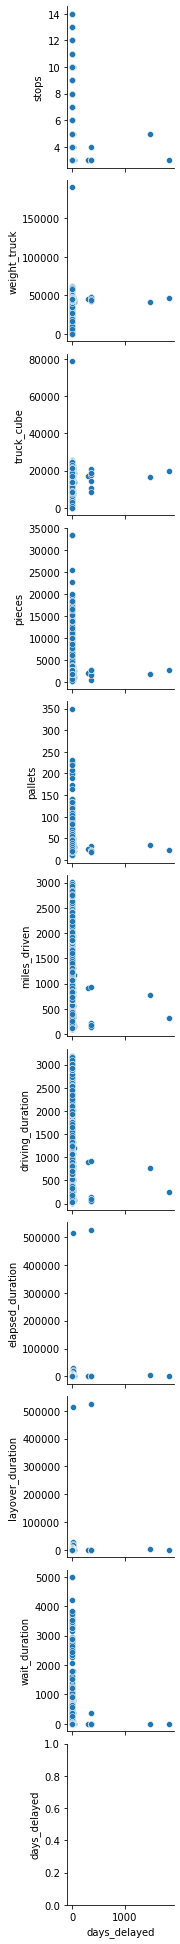

In [34]:
sns.pairplot(raw_data1, x_vars=["days_delayed"])
plt.show()

#Since we on;y want data with a delay, we removed all the shipments with no delay, including ones that arrived early. We also removed all the ones delayed by only a day, and the outliers of more than 5 days, since it's hard to get a look at the rest of the data as it greatly skewes the graph in either direction.

In [35]:
raw_data1[raw_data1['days_delayed'] > 5] = 0
raw_data1= raw_data1[raw_data1['days_delayed'] != 0]
raw_data1= raw_data1[raw_data1['days_delayed'] != 1]
raw_data1["days_delayed"].median()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


3.0

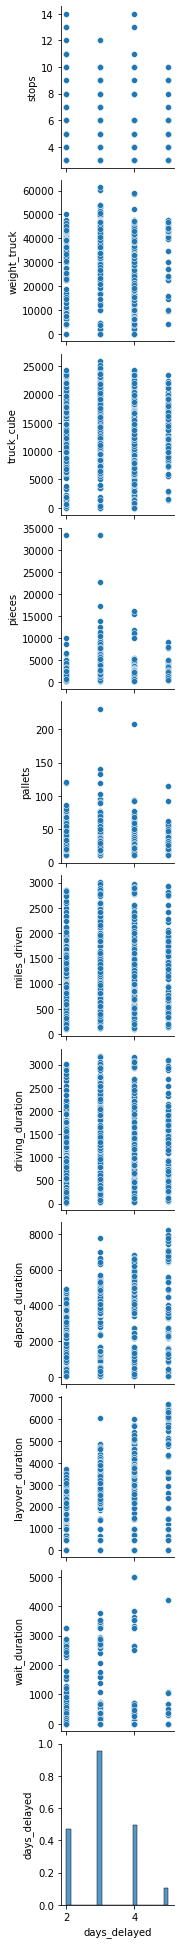

In [36]:
sns.pairplot(raw_data1, x_vars=["days_delayed"])
plt.show()